In [2]:
from datetime import datetime, timedelta
from typing import List, Dict, Any
from kiteconnect import KiteConnect
from queue import Queue
from Bardata import BarData
import os
import sys
import csv
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import pandas as pd
from threading import *
import threading
import numpy as np

In [3]:
start ='2025-04-01'
end='2025-05-29'

all_dates = [(datetime.strptime(start,"%Y-%m-%d") + timedelta(days=i)).strftime("%Y-%m-%d") for i in range((datetime.strptime(end,"%Y-%m-%d") - datetime.strptime(start,"%Y-%m-%d")).days + 1)]
folder_path = os.path.join(os.getcwd(), "oi_data")
oi_df = pd.DataFrame(columns=['Date','Mean','Standard Deviation'])
for date in all_dates:
    file_path = os.path.join(folder_path,f"{date}"+"_oi_data.csv")
    oi_dataframe = pd.read_csv(file_path)
    if oi_dataframe.empty:
        continue
    oi_ratio = oi_dataframe['Inverse OI_ratio'].mean()
    oi_std = oi_dataframe['Inverse OI_ratio'].std()
    print(f"Date: {date}, OI Ratio mean: {oi_ratio}, Standard Deviation: {oi_std}")
    oi_df = pd.concat([oi_df, pd.DataFrame({'Date': [date], 'Mean': [oi_ratio], 'Standard Deviation': [oi_std]})], ignore_index=True)
oi_df

Date: 2025-04-01, OI Ratio mean: -0.7078974160854007, Standard Deviation: 0.011220714218808207
Date: 2025-04-02, OI Ratio mean: -0.7033960743070153, Standard Deviation: 0.011668575754949463
Date: 2025-04-03, OI Ratio mean: -0.6927623876405664, Standard Deviation: 0.011126818270917051
Date: 2025-04-04, OI Ratio mean: -0.7178352048622707, Standard Deviation: 0.011843885655114902
Date: 2025-04-07, OI Ratio mean: -0.791522927814671, Standard Deviation: 0.04127375485202364
Date: 2025-04-08, OI Ratio mean: -0.8204488013029733, Standard Deviation: 0.027148249091286696
Date: 2025-04-09, OI Ratio mean: -0.7871532290063569, Standard Deviation: 0.005032094461605392
Date: 2025-04-11, OI Ratio mean: -0.7750992852249741, Standard Deviation: 0.014223964039688938
Date: 2025-04-15, OI Ratio mean: -0.736626718668897, Standard Deviation: 0.007583629799629391
Date: 2025-04-16, OI Ratio mean: -0.704840947205701, Standard Deviation: 0.01896471004426078
Date: 2025-04-17, OI Ratio mean: -0.6357318926025887, S

/var/folders/cn/tfff3ckj5rgbdz6t7kthy19m0000gn/T/ipykernel_40188/2003342311.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  oi_df = pd.concat([oi_df, pd.DataFrame({'Date': [date], 'Mean': [oi_ratio], 'Standard Deviation': [oi_std]})], ignore_index=True)


,Date,Mean,Standard Deviation
0,2025-04-01,-0.707897,0.011221
1,2025-04-02,-0.703396,0.011669
2,2025-04-03,-0.692762,0.011127
3,2025-04-04,-0.717835,0.011844
4,2025-04-07,-0.791523,0.041274
5,2025-04-08,-0.820449,0.027148
6,2025-04-09,-0.787153,0.005032
7,2025-04-11,-0.775099,0.014224
8,2025-04-15,-0.736627,0.007584
9,2025-04-16,-0.704841,0.018965


<Axes: >

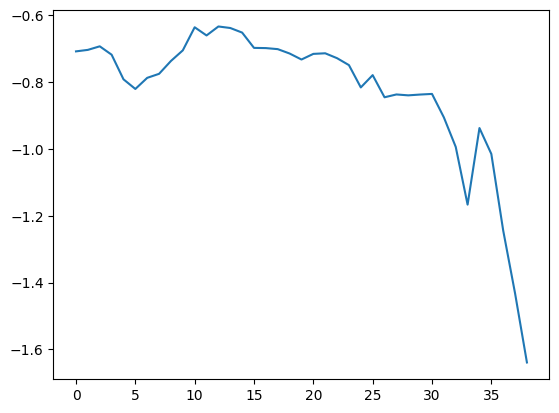

In [4]:
oi_df['Mean'].plot()

Short delta on 2025-05-02 10:00:00+05:30


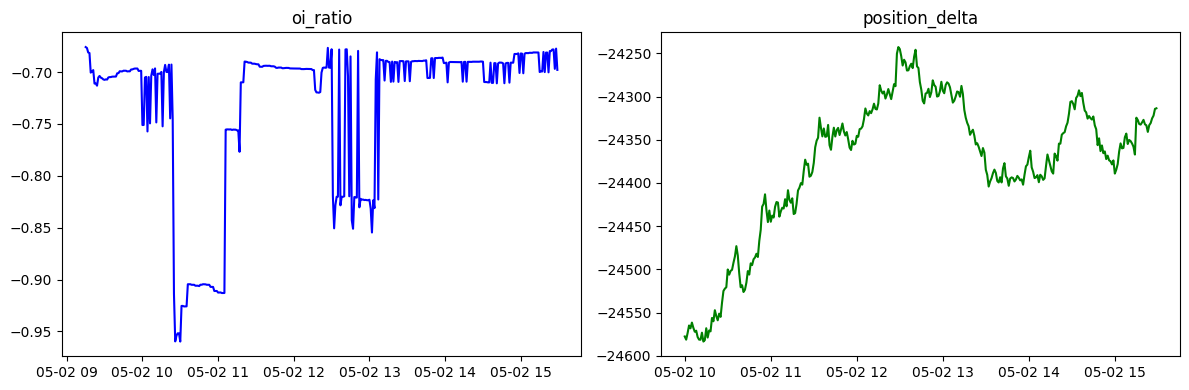

{'2025-05-02 10:00:00+05:30': []}
Short delta on 2025-05-05 09:35:00+05:30


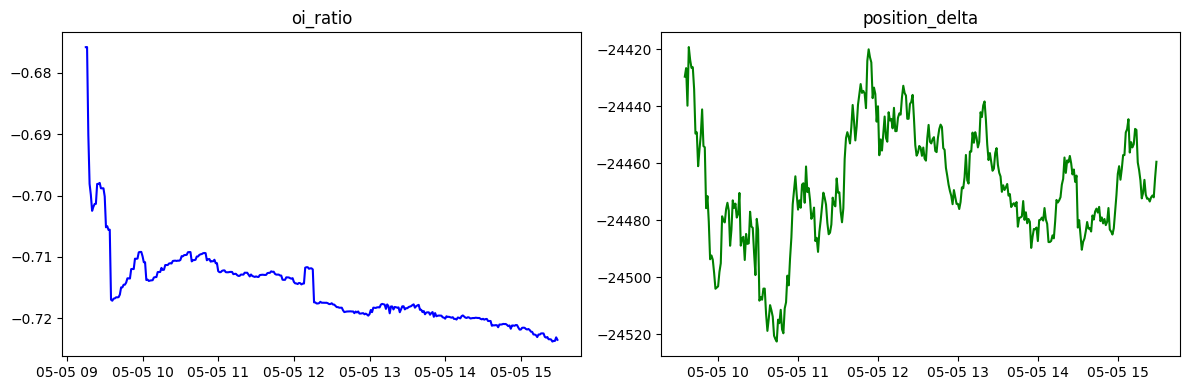

{'2025-05-05 09:35:00+05:30': []}
Short delta on 2025-05-06 09:27:00+05:30


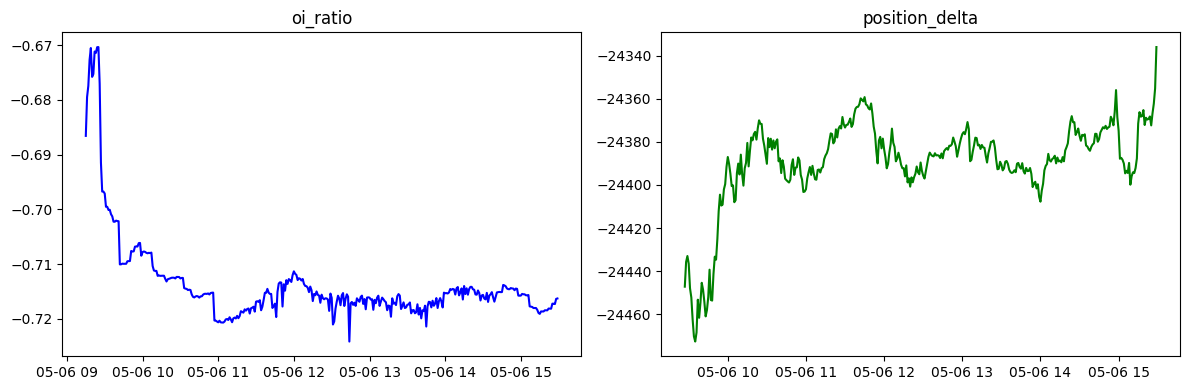

{'2025-05-06 09:27:00+05:30': []}
not enough values to unpack (expected 2, got 0)
{}
Short delta on 2025-05-08 09:55:00+05:30


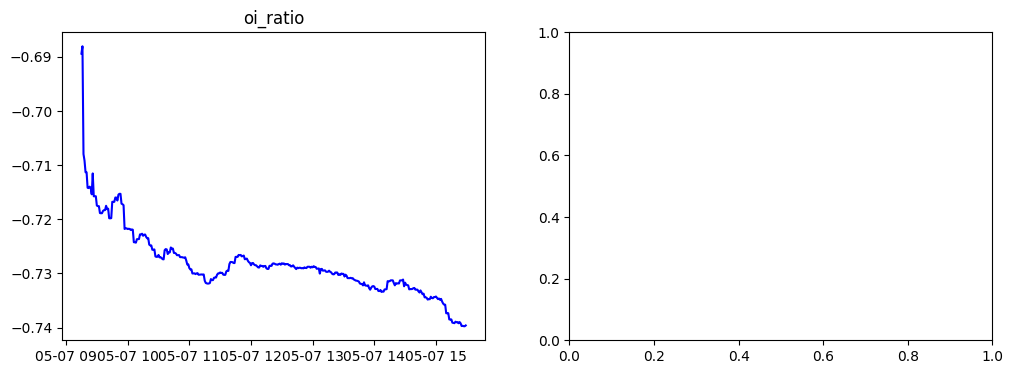

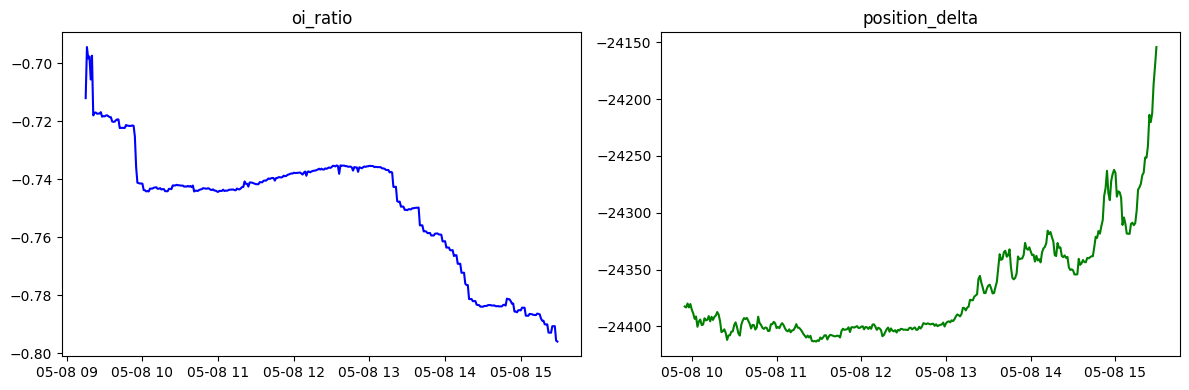

{'2025-05-08 09:55:00+05:30': []}
Short delta on 2025-05-09 11:16:00+05:30


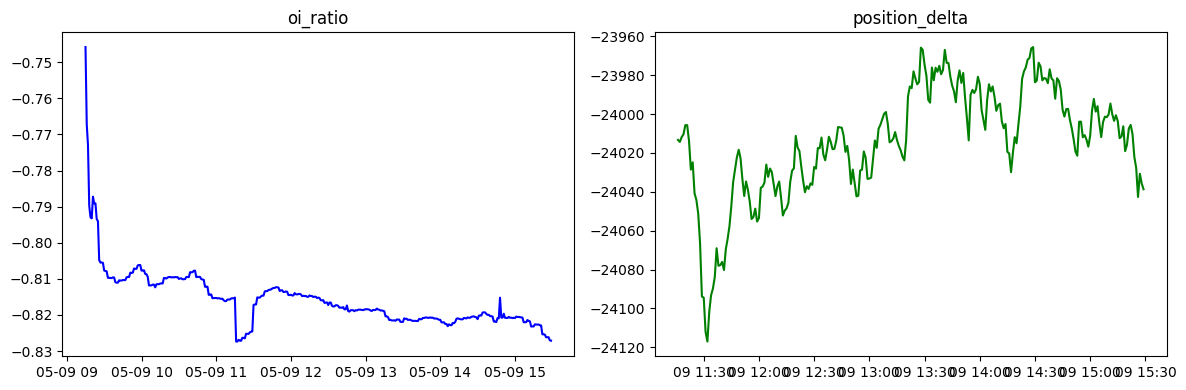

{'2025-05-09 11:16:00+05:30': []}
Long delta on 2025-05-12 14:19:00+05:30


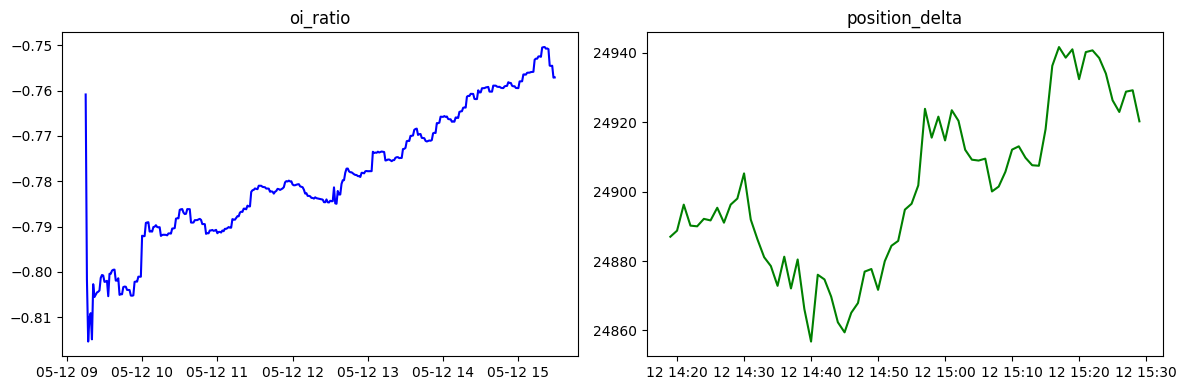

{'2025-05-12 14:19:00+05:30': []}
Short delta on 2025-05-13 13:13:00+05:30


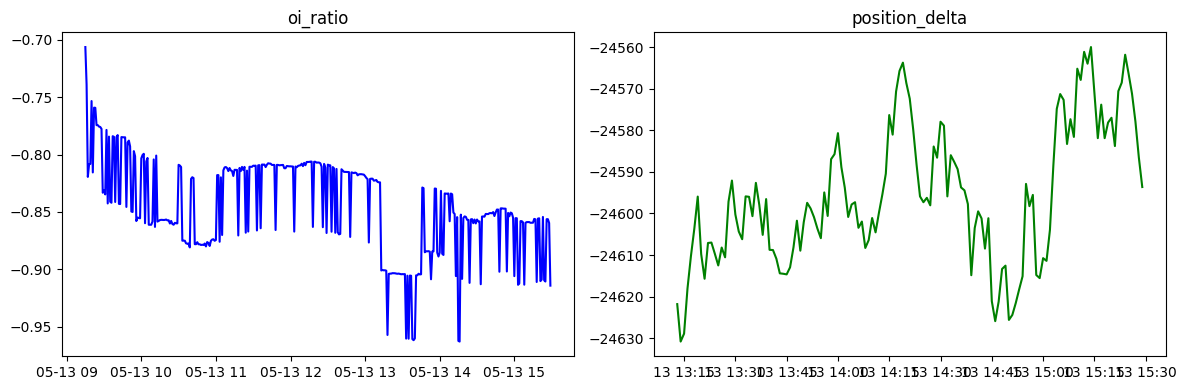

{'2025-05-13 13:13:00+05:30': []}
not enough values to unpack (expected 2, got 0)
{}
Long delta on 2025-05-15 13:19:00+05:30


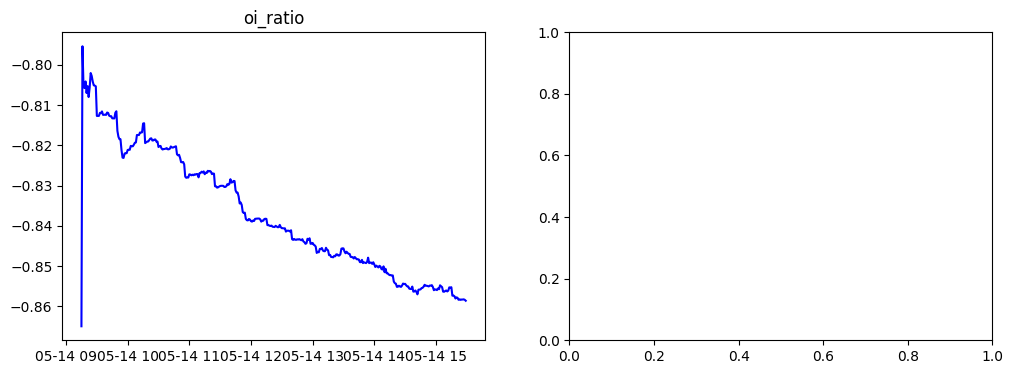

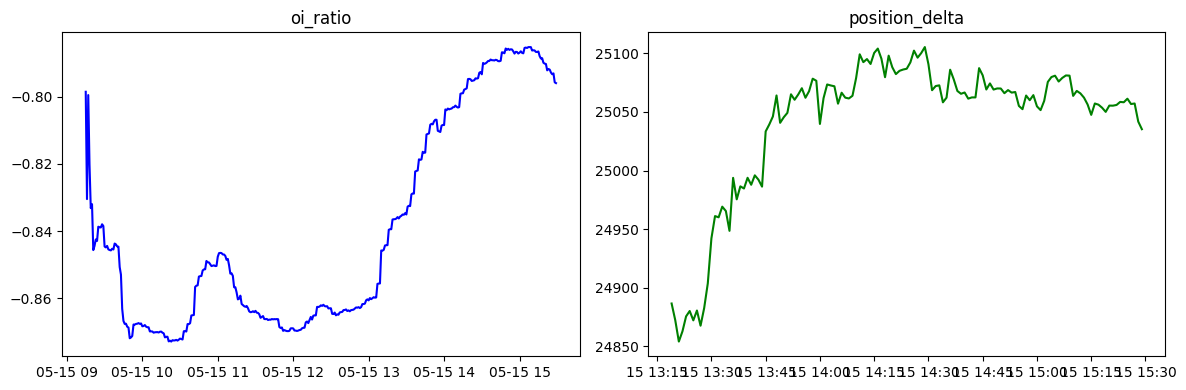

{'2025-05-15 13:19:00+05:30': []}
Short delta on 2025-05-16 10:49:00+05:30


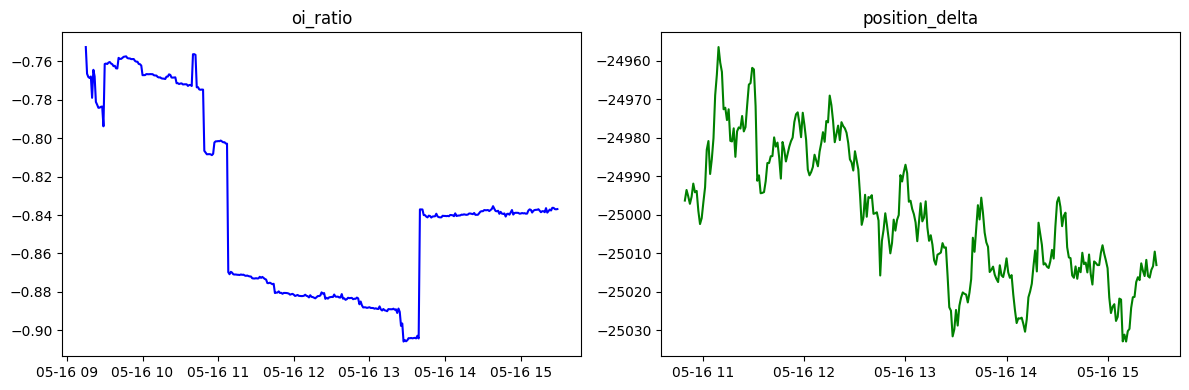

{'2025-05-16 10:49:00+05:30': []}
Short delta on 2025-05-19 11:36:00+05:30


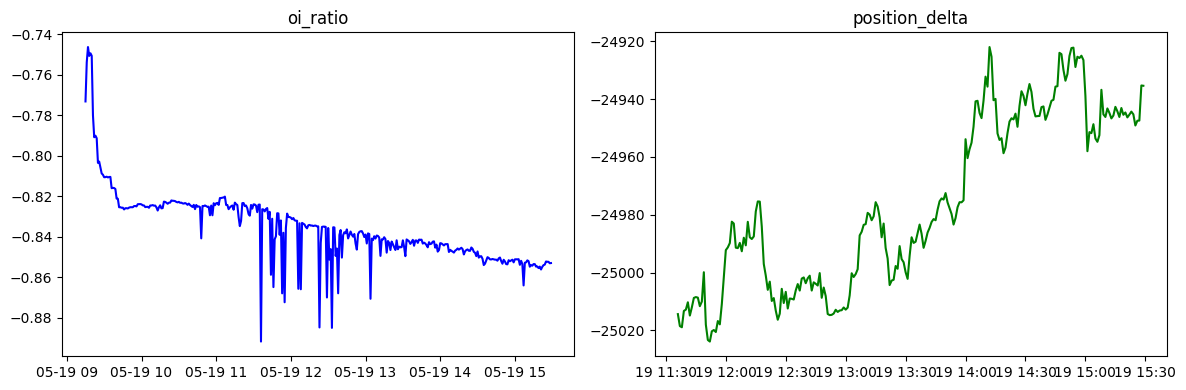

{'2025-05-19 11:36:00+05:30': []}
Short delta on 2025-05-20 09:58:00+05:30


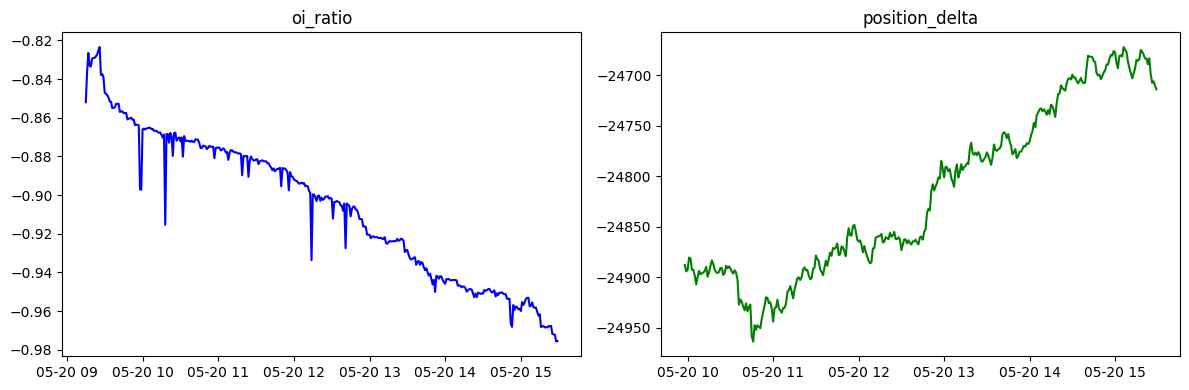

{'2025-05-20 09:58:00+05:30': []}
Short delta on 2025-05-21 12:13:00+05:30


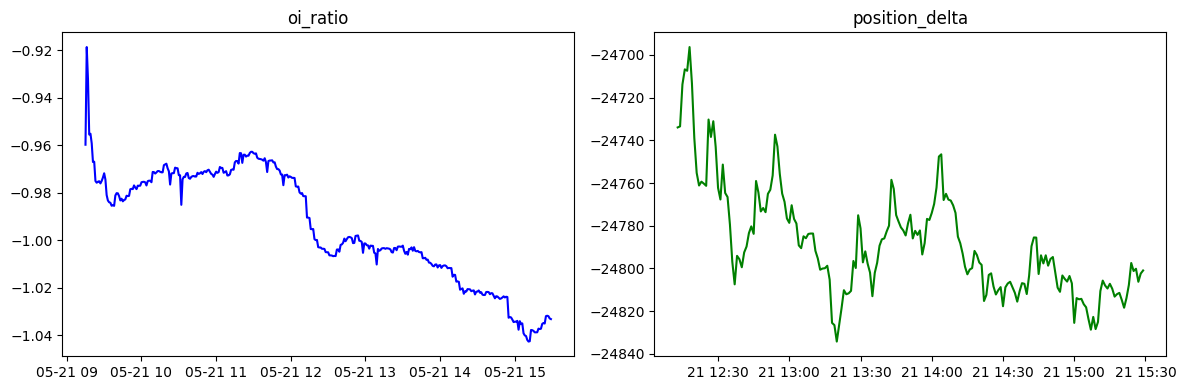

{'2025-05-21 12:13:00+05:30': []}
Short delta on 2025-05-22 13:01:00+05:30


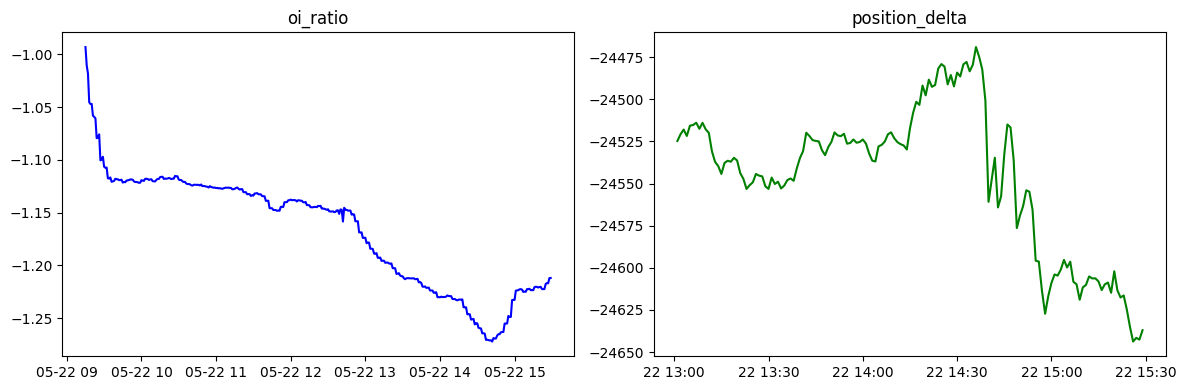

{'2025-05-22 13:01:00+05:30': []}
Long delta on 2025-05-23 09:24:00+05:30


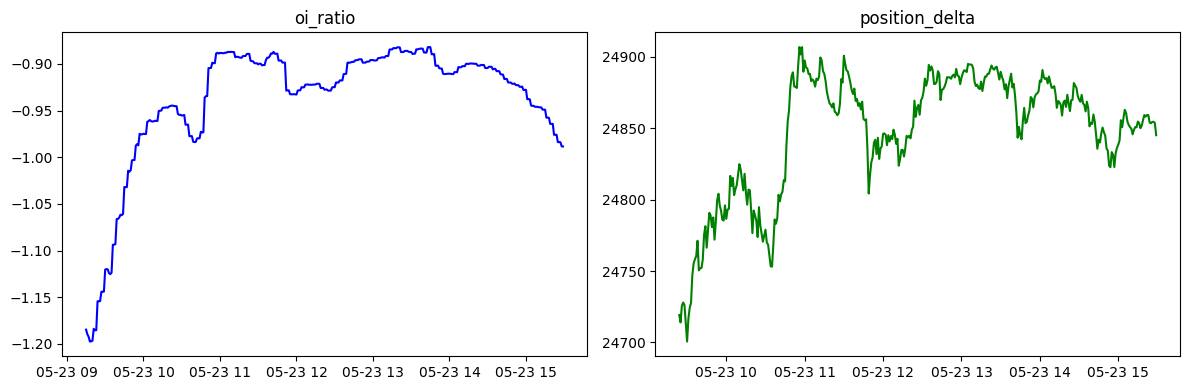

{'2025-05-23 09:24:00+05:30': []}
Long delta on 2025-05-26 09:36:00+05:30
exit long delta on 2025-05-26 10:30:00+05:30
Short delta on 2025-05-26 10:31:00+05:30


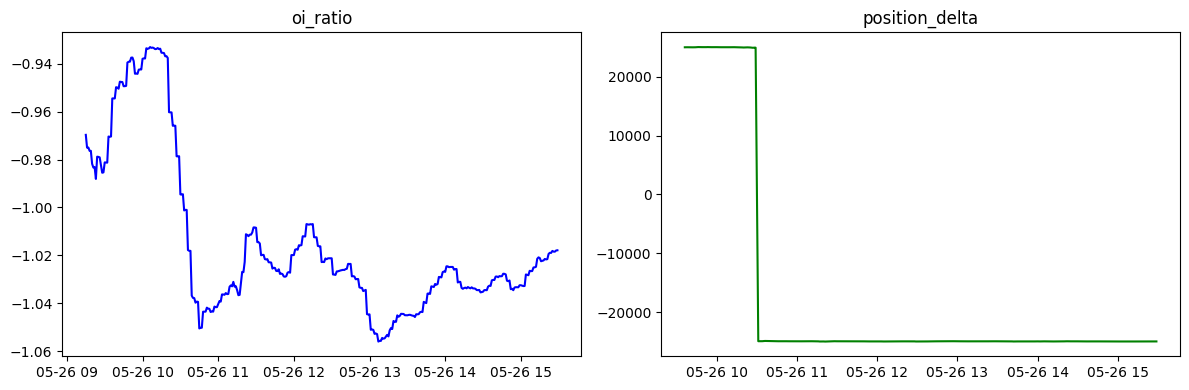

{'2025-05-26 09:36:00+05:30': [], '2025-05-26 10:30:00+05:30': [], '2025-05-26 10:31:00+05:30': []}
Short delta on 2025-05-27 09:21:00+05:30


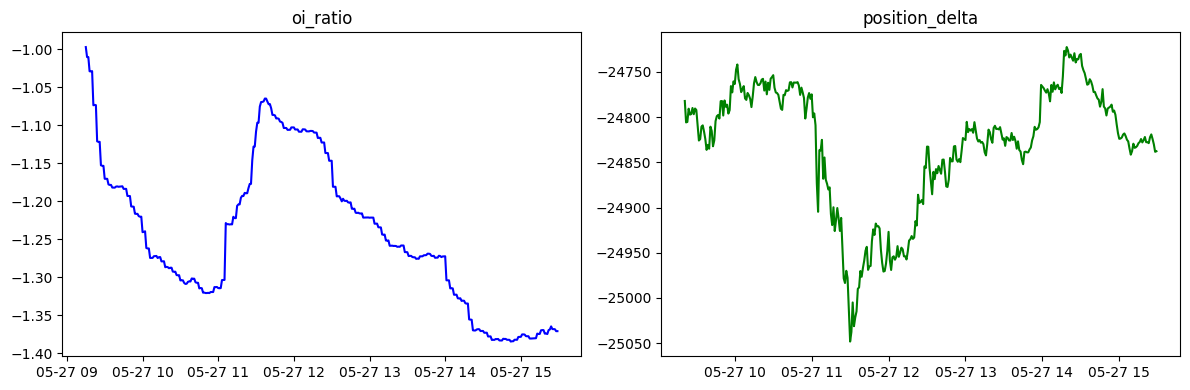

{'2025-05-27 09:21:00+05:30': []}
Short delta on 2025-05-28 09:27:00+05:30


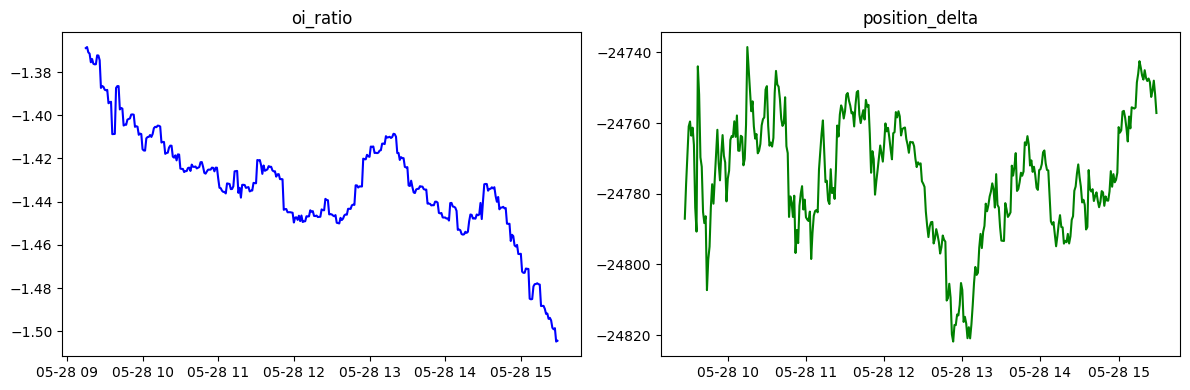

{'2025-05-28 09:27:00+05:30': []}
Short delta on 2025-05-29 09:24:00+05:30
exit short delta on 2025-05-29 10:03:00+05:30
Long delta on 2025-05-29 10:06:00+05:30
exit long delta on 2025-05-29 10:31:00+05:30
Short delta on 2025-05-29 10:32:00+05:30
exit short delta on 2025-05-29 15:10:00+05:30
Long delta on 2025-05-29 15:11:00+05:30


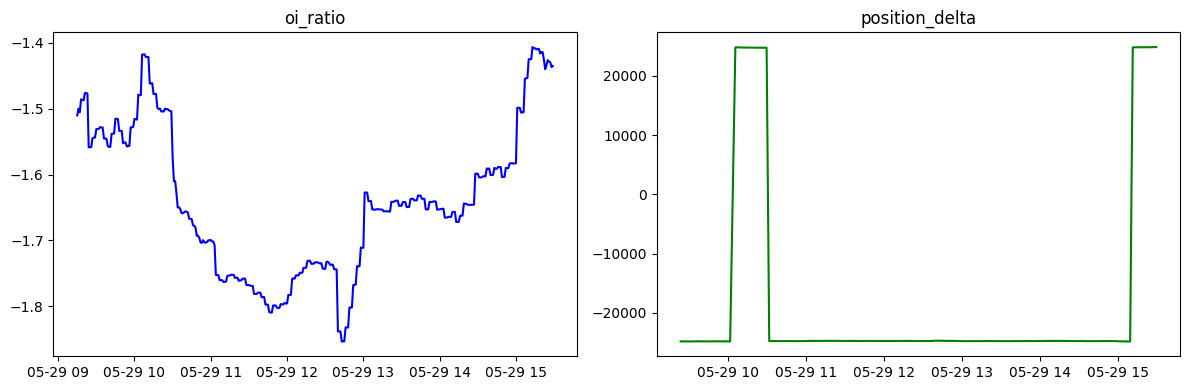

{'2025-05-29 09:24:00+05:30': [], '2025-05-29 10:03:00+05:30': [], '2025-05-29 10:06:00+05:30': [], '2025-05-29 10:31:00+05:30': [], '2025-05-29 10:32:00+05:30': [], '2025-05-29 15:10:00+05:30': [], '2025-05-29 15:11:00+05:30': []}
Long delta on 2025-05-30 09:24:00+05:30
exit long delta on 2025-05-30 10:18:00+05:30
Short delta on 2025-05-30 10:19:00+05:30


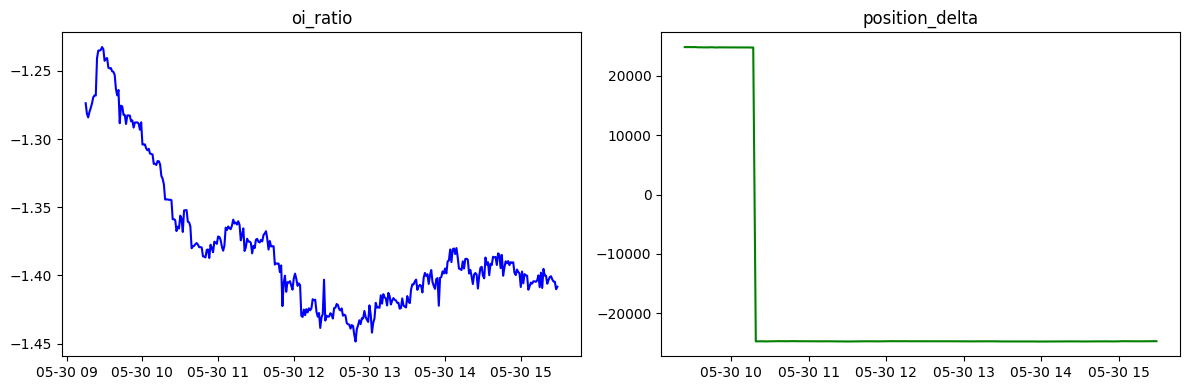

{'2025-05-30 09:24:00+05:30': [], '2025-05-30 10:18:00+05:30': [], '2025-05-30 10:19:00+05:30': []}


In [3]:
load_dotenv()

start ='2025-05-01'
end='2025-05-30'

all_dates = [(datetime.strptime(start,"%Y-%m-%d") + timedelta(days=i)).strftime("%Y-%m-%d") for i in range((datetime.strptime(end,"%Y-%m-%d") - datetime.strptime(start,"%Y-%m-%d")).days + 1)]
folder_path = os.path.join(os.getcwd(), "oi_data")

kite = KiteConnect(api_key=os.getenv('api_key'),access_token=os.getenv('access_token'))

for date in all_dates:
    file_path = os.path.join(folder_path,f"{date}"+"_oi_data.csv")
    oi_dataframe = pd.read_csv(file_path)
    if oi_dataframe.empty:
        continue
    nifty_df = pd.DataFrame(kite.historical_data(instrument_token=256265, from_date=date, to_date=date, interval='minute'))
    nifty_df['Inverse OI_ratio'] = 0
    oi_dataframe['oir']=oi_dataframe['Inverse OI_ratio']
    oi_ratio = []
    long = False
    short = False
    position = 0
    position_delta = []
    trades={}
    zscore = 2

    def place_trade(tk,type,timestamp):
        price = kite.historical_data(tk,(timestamp).split(' ')[0].strip(),(timestamp).split(' ')[0].strip(),'minute')
        option_price = next(item['close'] for item in price if item['date'] == datetime.fromisoformat(timestamp))
        symbol = instruments[instruments['instrument_token'] == tk]['tradingsymbol'].values[0]
        trades[timestamp].append((symbol,tk,type,option_price))
        return

    for row in oi_dataframe.itertuples():
        
        if nifty_df[nifty_df['date'] == row.timestamp].empty:
            continue
        # print(nifty_df.loc[nifty_df['date'] == row.timestamp,'close'].values[0])

        oi_ratio.append((row.timestamp,row.oir))
        if len(oi_ratio)<5:
            continue

        oi_values = [v for _,v in oi_ratio]
        oi_ratio_mean = np.mean(oi_values)
        oi_ratio_std = np.std(oi_values)

        change =  oi_values[-1] - oi_ratio_mean
        
        # if not position:
        if True:
            if not long and not short :
                if change < -zscore*oi_ratio_std :
                # if change < 0
                    print(f"Short delta on {row.timestamp}")
                    nifty_price = nifty_df.loc[nifty_df['date'] == row.timestamp,'close'].values[0]
                    data = pd.DataFrame(kite.instruments('NFO'))
                    instruments = data[(data['name']=='NIFTY')]
                    token = instruments[(instruments['expiry']==sorted(instruments['expiry'].unique())[0])&(instruments['strike'] == (round(nifty_price/50)*50))]['instrument_token'].values
                    position -= 1
                    trades[row.timestamp] = []
                    # for tk in token:
                        

                    #     if instruments[instruments['instrument_token'] == tk]['instrument_type'].values[0] == 'CE':
                    #         # price = kite.historical_data(tk,(row.timestamp).split(' ')[0].strip(),(row.timestamp).split(' ')[0].strip(),'minute')
                    #         # option_price = next(item['close'] for item in price if item['date'] == datetime.fromisoformat(row.timestamp))
                    #         # symbol = instruments[instruments['instrument_token'] == tk]['tradingsymbol'].values[0]
                    #         place_trade(tk,'sell',row.timestamp)
                    #     else:
                    #         # price = kite.historical_data(tk,(row.timestamp).split(' ')[0].strip(),(row.timestamp).split(' ')[0].strip(),'minute')
                    #         # option_price = next(item['close'] for item in price if item['date'] == datetime.fromisoformat(row.timestamp))
                    #         # symbol = instruments[instruments['instrument_token'] == tk]['tradingsymbol'].values[0]
                    #         # trades[row.timestamp].append(symbol,tk,'buy',option_price)
                    #         place_trade(tk,'buy',row.timestamp)
                    #         # print(f"Buy {tk} at {price} on {row.timestamp}")

                    position_delta.append((row.timestamp,-nifty_price))
                    short=True
                if change > zscore*oi_ratio_std :
                    print(f"Long delta on {row.timestamp}")
                    position+=1
                    nifty_price = nifty_df.loc[nifty_df['date'] == row.timestamp,'close'].values[0]
                    position_delta.append((row.timestamp,nifty_df.loc[nifty_df['date'] == row.timestamp,'close'].values[0]))
                    instruments = pd.DataFrame(kite.instruments('NFO'))
                    instruments = instruments[(instruments['name']=='NIFTY')]
                    # print(instruments)
                    token = instruments[(instruments['expiry']==sorted(instruments['expiry'].unique())[0])&(instruments['strike'] == int(round(nifty_price/50)*50))]['instrument_token'].values
                    trades[row.timestamp] = []
                    # for tk in token:


                    #     if instruments[instruments['instrument_token'] == tk]['instrument_type'].values[0] == 'CE':
                    #         # price = kite.historical_data(tk,(row.timestamp).split(' ')[0].strip(),(row.timestamp).split(' ')[0].strip(),'minute')
                    #         # option_price = next(item['close'] for item in price if item['date'] == datetime.fromisoformat(row.timestamp))
                    #         # symbol = instruments[instruments['instrument_token'] == tk]['tradingsymbol'].values[0]
                    #         # trades[row.timestamp].append(symbol,tk,'buy',option_price)
                    #         place_trade(tk,'buy',row.timestamp)
                    #     else:
                    #         # price = kite.historical_data(tk,(row.timestamp).split(' ')[0].strip(),(row.timestamp).split(' ')[0].strip(),'minute')
                    #         # option_price = next(item['close'] for item in price if item['date'] == datetime.fromisoformat(row.timestamp))
                    #         # symbol = instruments[instruments['instrument_token'] == tk]['tradingsymbol'].values[0]
                    #         # trades[row.timestamp].append(symbol,tk,'sell',option_price)
                    #         place_trade(tk,'sell',row.timestamp)
                    #         # print(f"Buy {tk} at {price} on {row.timestamp}")
                    long=True
                
            else:
                if long and change < -zscore*oi_ratio_std :
                    print(f"exit long delta on {row.timestamp}")
                    trades[row.timestamp] = []
                    position-=1
                    # for tk in token:
                    #     if instruments[instruments['instrument_token'] == tk]['instrument_type'].values[0] == 'CE':
                    #         place_trade(tk,'sell',row.timestamp)
                    #     else:
                    #         place_trade(tk,'buy',row.timestamp)
                    long=False
                    
                if short and change > zscore*oi_ratio_std :
                    trades[row.timestamp] = []
                    print(f"exit short delta on {row.timestamp}")
                    position+=1
                    # for tk in token:
                    #     if instruments[instruments['instrument_token'] == tk]['instrument_type'].values[0] == 'CE':
                    #         place_trade(tk,'buy',row.timestamp)
                    #     else:
                    #         place_trade(tk,'sell',row.timestamp)

                    short=False


            if long:
                position_delta.append((row.timestamp,nifty_df.loc[nifty_df['date'] == row.timestamp,'close'].values[0]))
            elif short:   
                position_delta.append((row.timestamp,-nifty_df.loc[nifty_df['date'] == row.timestamp,'close'].values[0]))

        # else:
        #     position_delta.append((row.timestamp,24500))
        
    try:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

        # Plot in the first subplot
        x1,y1 = zip(*oi_ratio)
        ax1.plot(pd.to_datetime(x1),y1, color='blue')
        ax1.set_title('oi_ratio')
        # ax1.set_xlabel('X-axis')
        # ax1.set_ylabel('Y1-axis')

        # Plot in the second subplot
        x,y = zip(*position_delta)
        ax2.plot(pd.to_datetime(x),y, color='green')
        ax2.set_title('position_delta')
        # ax2.set_xlabel('X-axis')
        # ax2.set_ylabel('Y2-axis')

        # Adjust layout to avoid overlap
        plt.tight_layout()

        # Show the figure
        plt.show()
    except Exception as e:
        print(e)    

    print(trades)


    # print(nifty_df)

        




# kite.historical_data(256265, from_date='2025-05-29', to_date='2025-05-29', interval='minute',oi=True)

In [4]:
trades

{'2025-05-30 09:24:00+05:30': [],
 '2025-05-30 10:18:00+05:30': [],
 '2025-05-30 10:19:00+05:30': []}

In [58]:
price = kite.historical_data(10364162,'2025-05-30','2025-05-30','minute')
timestamp = '2025-05-30 09:24:00+05:30'
option_price = next(item['close'] for item in price if item['date'] == datetime.fromisoformat(timestamp))
option_price

232.15